In [1]:
# Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Cluster Modeling

In this step we'll load the cleaned data set and then perform the modeling steps.

In [4]:
# Load cleaned data from eda step
file_path = "../data/cleaned_diabetes_health_indicators_dataset.csv"
df = pd.read_csv(file_path)

In [5]:
# Perform Logistic Regression on the data set

# Numerical Predictors
# BMI
# MentHlth
# PhysHlth
# Age

# Categorical Predictors
# HighBP
# HighChol
# CholCheck
# Smoker
# Stroke
# HeartDiseaseorAttack
# PhysActivity
# Fruits
# Veggies
# HvyAlcoholConsump
# AnyHealthcare
# NoDocbcCost
# GenHlth
# DiffWalk
# Sex
# Education
# Income

# Target
# Diabetes_012

# Standardize Data
dependent_column = ["Diabetes_012"]
numerical_predictor_columns = ["BMI", "MentHlth", "PhysHlth", "Age"]

# Find Z-score of Numerical Predictors
Z_train = preprocessing.scale(df[numerical_predictor_columns])
Z_train = pd.DataFrame(Z_train, columns=numerical_predictor_columns)

# Create dummy vars
dummy_HighBP = pd.get_dummies(df["HighBP"], drop_first=True)
dummy_HighChol = pd.get_dummies(df["HighChol"], drop_first=True)
dummy_CholCheck = pd.get_dummies(df["CholCheck"], drop_first=True)
dummy_Smoker = pd.get_dummies(df["Smoker"] , drop_first=True)
dummy_Stroke = pd.get_dummies(df["Stroke"] , drop_first=True)
dummy_HeartDiseaseorAttack = pd.get_dummies(df["HeartDiseaseorAttack"] , drop_first=True)
dummy_PhysActivity = pd.get_dummies(df["PhysActivity"] , drop_first=True)
dummy_Fruits = pd.get_dummies(df["Fruits"] , drop_first=True)
dummy_Veggies = pd.get_dummies(df["Veggies"] , drop_first=True)
dummy_HvyAlcoholConsump = pd.get_dummies(df["HvyAlcoholConsump"] , drop_first=True)
dummy_AnyHealthcare = pd.get_dummies(df["AnyHealthcare"] , drop_first=True)
dummy_NoDocbcCost = pd.get_dummies(df["NoDocbcCost"] , drop_first=True)
dummy_GenHlth = pd.get_dummies(df["GenHlth"] , drop_first=True)
dummy_DiffWalk = pd.get_dummies(df["DiffWalk"] , drop_first=True)
dummy_Sex = pd.get_dummies(df["Sex"] , drop_first=True)
dummy_Education = pd.get_dummies(df["Education"] , drop_first=True)
dummy_Income = pd.get_dummies(df["Income"] , drop_first=True)

# Concatenate the standardized numerical features with the dummy vars
X = pd.concat([Z_train, dummy_HighBP, dummy_HighChol, dummy_CholCheck, dummy_Smoker, dummy_Stroke, dummy_HeartDiseaseorAttack,
                     dummy_PhysActivity, dummy_Fruits, dummy_Veggies, dummy_HvyAlcoholConsump, dummy_AnyHealthcare, dummy_NoDocbcCost,
                    dummy_GenHlth, dummy_DiffWalk, dummy_Sex, dummy_Education, dummy_Income], axis=1)
X.columns = X.columns.astype(str)
y = df[dependent_column]

# Do this to avoid warnings
y = y.values.ravel()

# Split data into training and test data after standardization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1337)

In [6]:
print(X.shape, y.shape)

(229781, 34) (229781,)


In [7]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [8]:
print(X_resampled.shape, y_resampled.shape)

(11109, 34) (11109,)


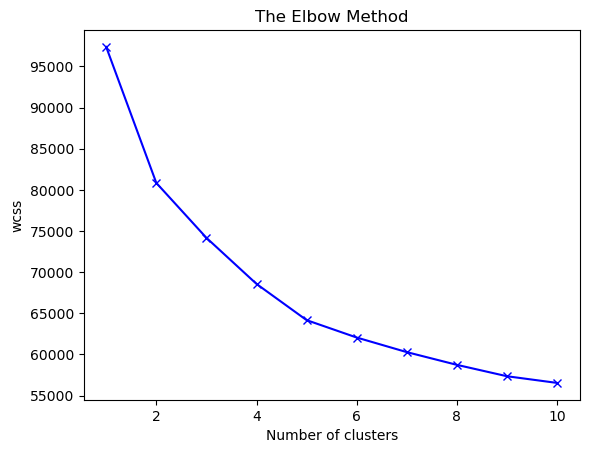

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_resampled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, 'bx-')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [10]:
wcss = pd.DataFrame(wcss, columns = ['wcss'])
wcss['wcss_diff'] = wcss['wcss'].diff()
wcss

,wcss,wcss_diff
0,97361.743948,NaN
1,80840.843478,-16520.900470
2,74171.207807,-6669.635670
3,68568.154907,-5603.052900
4,64167.473500,-4400.681408
5,62054.117029,-2113.356471
6,60280.546570,-1773.570459
7,58733.959320,-1546.587250
8,57350.138953,-1383.820367
9,56539.304198,-810.834756


In [11]:
wcss[wcss['wcss_diff'] > wcss['wcss_diff'].mean()]

,wcss,wcss_diff
4,64167.473500,-4400.681408
5,62054.117029,-2113.356471
6,60280.546570,-1773.570459
7,58733.959320,-1546.587250
8,57350.138953,-1383.820367
9,56539.304198,-810.834756


In [12]:
clusters = 4

## Agglomerative Clustering(Heirachical Clustering)

In [14]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [15]:
Complete = AgglomerativeClustering(metric='cosine', n_clusters=clusters, linkage='complete')
Complete.fit(X_resampled)
#print(Complete.labels_)

N_Complete = linkage(Complete.children_, method='complete')

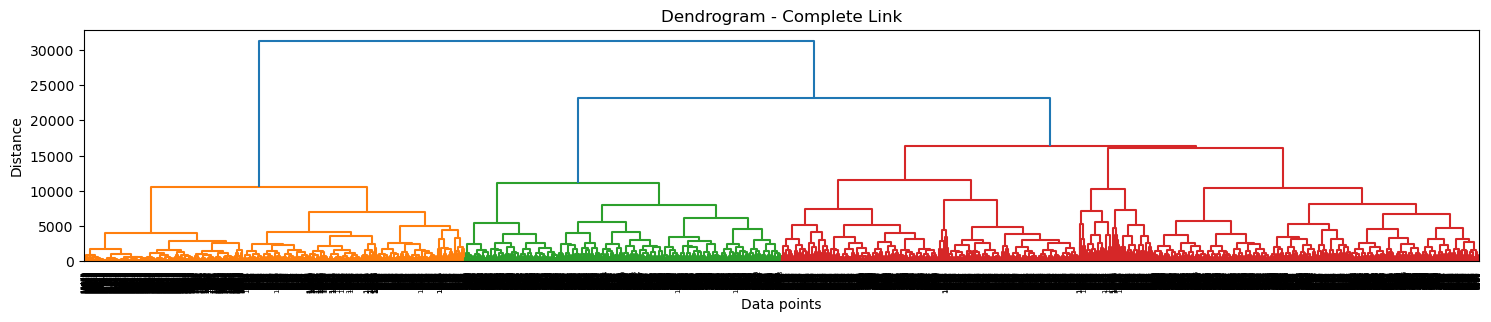

In [16]:
# Create the figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 3))

# Plot the dendrogram on subplots
dendrogram(N_Complete, ax=axes)

# Set titles and labels for subplots
axes.set_title('Dendrogram - Complete Link')
axes.set_xlabel('Data points')
axes.set_ylabel('Distance')


# Show the figure
plt.show()

In [17]:
from scipy.cluster.hierarchy import fcluster

# Cut the linkage into clusters using a distance threshold
distance_threshold = 10000
cluster_labels = fcluster(N_Complete, t=distance_threshold, criterion='distance')
unique_labels = np.unique(cluster_labels)
print(unique_labels)
print(cluster_labels.shape)

[ 1  2  3  4  5  6  7  8  9 10]
(11108,)


In [18]:
from matplotlib.colors import ListedColormap
colors = ['red', 'green', 'blue', 'orange', 'yellow']
cmap = ListedColormap(colors)

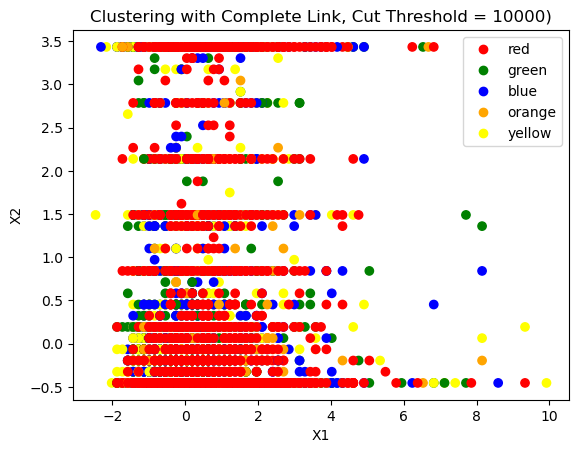

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X_resampled.iloc[1:,0], X_resampled.iloc[1:,1], c=cluster_labels, cmap=cmap)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Clustering with Complete Link, Cut Threshold = 10000)')

legend_handles = [plt.Line2D([], [], marker='o', color=color, linestyle='None') for color in colors]
legend_labels = colors

# Create the legend
plt.legend(legend_handles, legend_labels)

plt.show()

In [20]:
pred_final = Complete.fit_predict(X_test)

In [21]:
# Save final cluster predictions for ensemble voting
os.makedirs("results", exist_ok=True)
np.save("results/y_pred_cluster.npy", pred_final)

## Kmeans Clustering

In [23]:
kclusters = clusters

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(X_resampled)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:500]

array([3, 0, 1, 3, 2, 1, 3, 1, 3, 0, 3, 0, 1, 1, 3, 1, 3, 3, 1, 3, 3, 3,
       3, 1, 3, 0, 3, 1, 3, 1, 1, 1, 1, 1, 3, 2, 3, 3, 3, 3, 2, 0, 3, 0,
       1, 0, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 2, 3,
       1, 3, 1, 3, 2, 1, 1, 3, 1, 1, 1, 2, 3, 1, 3, 0, 3, 3, 3, 1, 3, 1,
       1, 1, 3, 3, 1, 3, 3, 0, 3, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3, 3, 3, 1,
       3, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 3, 1, 1, 3, 3, 3, 1, 1, 3, 1, 1,
       1, 0, 1, 3, 3, 3, 0, 3, 1, 1, 1, 3, 3, 2, 3, 3, 3, 2, 1, 3, 3, 1,
       3, 3, 3, 3, 2, 3, 1, 3, 1, 3, 1, 0, 3, 1, 3, 3, 3, 3, 0, 1, 1, 3,
       3, 3, 3, 3, 0, 3, 1, 3, 1, 3, 3, 0, 3, 1, 3, 1, 3, 1, 1, 3, 1, 2,
       0, 1, 0, 1, 1, 2, 0, 3, 0, 3, 3, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 3,
       1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 2, 0, 3, 1, 2, 3, 3, 1, 0, 0,
       3, 1, 3, 1, 3, 3, 2, 3, 3, 1, 2, 1, 3, 1, 1, 1, 1, 3, 3, 1, 3, 3,
       1, 3, 1, 3, 1, 1, 2, 1, 3, 2, 0, 3, 3, 3, 3, 1, 0, 3, 0, 0, 1, 3,
       1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 1, 3, 3, 3,

In [24]:
kmeans.cluster_centers_[0:2]

array([[ 1.73328962, -0.13753801, -0.16017461,  0.04329827,  0.74691358,
         0.59539843,  0.98148148,  0.45959596,  0.04040404,  0.13131313,
         0.58305275,  0.52356902,  0.7379349 ,  0.0325477 ,  0.94107744,
         0.11784512,  0.18181818,  0.48597082,  0.26487093,  0.03479237,
         0.34343434,  0.41863075,  0.02749719,  0.07126824,  0.328844  ,
         0.3030303 ,  0.2687991 ,  0.07687991,  0.09034792,  0.10662177,
         0.12233446,  0.16105499,  0.16386083,  0.21773288],
       [-0.1672782 , -0.34278515, -0.31697906,  0.82799458,  0.68397813,
         0.63267452,  0.98801514,  0.5187132 ,  0.058873  ,  0.17178301,
         0.73906644,  0.66148024,  0.80613961,  0.04541632,  0.97497897,
         0.04625736,  0.33536585,  0.39381833,  0.15370059,  0.0187132 ,
         0.19428091,  0.4812868 ,  0.02859546,  0.04835997,  0.29142136,
         0.28111859,  0.35029437,  0.06118587,  0.08010934,  0.09987384,
         0.1450799 ,  0.1793524 ,  0.1755677 ,  0.22140454]])

In [25]:
from scipy.spatial.distance import cdist
distances = cdist(X_resampled, kmeans.cluster_centers_[kmeans.labels_], metric='cosine')
#print(distances)

unique_values, counts = np.unique(kmeans.labels_, return_counts=True)
SumErr = np.split(distances, np.cumsum(counts))[:-1]

# compute total error from each point to its cluster center
sum_group1 = np.sum(SumErr[0])
sum_group2 = np.sum(SumErr[1])
sum_group3 = np.sum(SumErr[2])
sum_group4 = np.sum(SumErr[3])
print([sum_group1, sum_group2, sum_group3,sum_group4])

[9383524.784009902, 24384258.73535443, 10586435.58740783, 12503829.224298893]


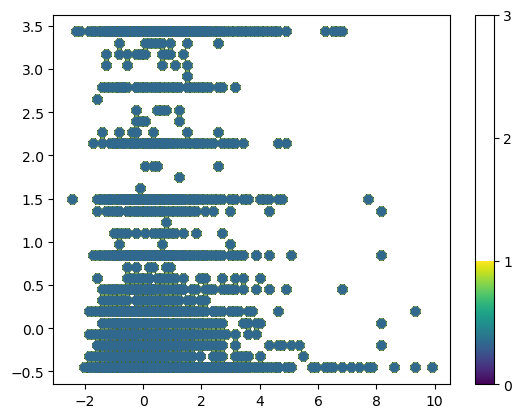

In [26]:
import matplotlib.pyplot as plt
# Define a color map
color_map = plt.cm.get_cmap('viridis', len(np.unique(kmeans.labels_)))

# Plot the points in A with colors based on values in B
for i in range(len(X_resampled)):
    plt.scatter(X_resampled.iloc[:, 0], X_resampled.iloc[:, 1], color=color_map(kmeans.labels_[i]))

# Add color bar for reference
cbar = plt.colorbar()
cbar.set_ticks(np.unique(kmeans.labels_))
cbar.set_ticklabels(np.unique(kmeans.labels_))

# Show the plot
plt.show()

## K-medoids Clustering

In [28]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=4).fit(X_resampled)

In [29]:
kmedoids.labels_

array([3, 2, 2, ..., 1, 2, 3])

In [30]:
kmedoids.labels_.shape

(11109,)

In [31]:
kmedoids.cluster_centers_[0:2]

array([[-0.39574617, -0.32479483, -0.40625194, -0.02798577,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.4883821 ,  0.8419592 ,  2.2466937 , -0.35121265,  1.        ,
         1.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ]])

In [32]:
kmedoids.cluster_centers_.shape

(4, 34)

In [33]:
from scipy.spatial.distance import cdist
distances = cdist(X_resampled, kmedoids.cluster_centers_[kmedoids.labels_], metric='cosine')
#print(distances)

unique_values, counts = np.unique(kmedoids.labels_, return_counts=True)
SumErr = np.split(distances, np.cumsum(counts))[:-1]

# compute total error from each point to its cluster center
sum_group1 = np.sum(SumErr[0])
sum_group2 = np.sum(SumErr[1])
sum_group3 = np.sum(SumErr[2])
sum_group4 = np.sum(SumErr[3])
print([sum_group1, sum_group2, sum_group3,sum_group4])

[15155452.297154926, 12392999.50772932, 21989783.728689916, 13406617.42107718]


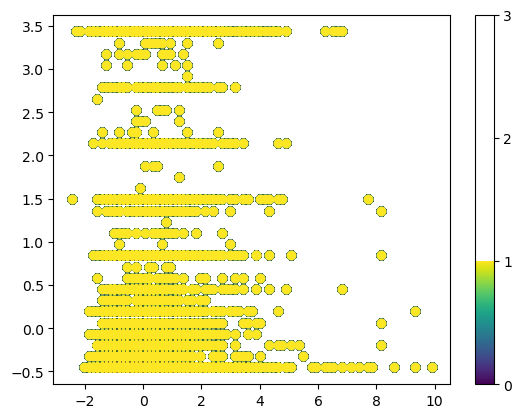

In [34]:
import matplotlib.pyplot as plt
# Define a color map
color_map = plt.cm.get_cmap('viridis', len(np.unique(kmedoids.labels_)))

# Plot the points in A with colors based on values in B
for i in range(len(X_resampled)):
    plt.scatter(X_resampled.iloc[:, 0], X_resampled.iloc[:, 1], color=color_map(kmedoids.labels_[i]))

# Add color bar for reference
cbar = plt.colorbar()
cbar.set_ticks(np.unique(kmedoids.labels_))
cbar.set_ticklabels(np.unique(kmedoids.labels_))

# Show the plot
plt.show()

## DBSCAN Clustering

In [36]:
df_DB = X_resampled[['BMI', 'PhysHlth']]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# normalization - fit and transform the data
df_scaled = scaler.fit_transform(df_DB)

diabetes_conclusion_label : {-1}


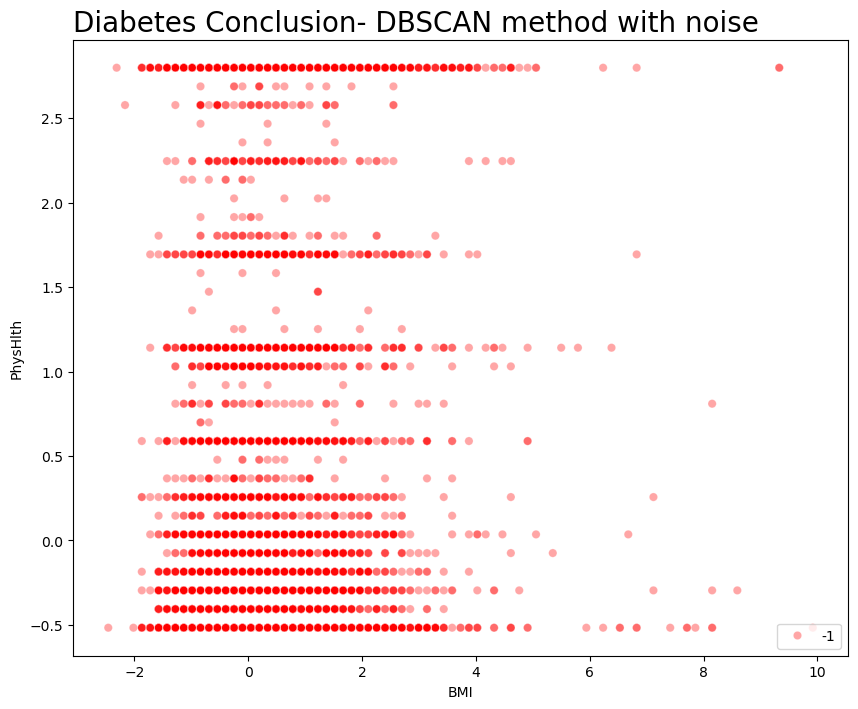

In [37]:
# apply the dbscan algorithm to the dataset
from sklearn.cluster import DBSCAN 
diabetes_conclusion = DBSCAN(eps=0.009, min_samples=70).fit(X_resampled) # Use trial and error

# labels of the clusters
diabetes_conclusion_label = diabetes_conclusion.labels_
print('diabetes_conclusion_label :', set(diabetes_conclusion.labels_))

# visualization of the results with a scatter plot
fig = plt.figure(figsize=(10, 8))
plt.title('Diabetes Conclusion- DBSCAN method with noise', loc='left', fontsize=20)
sns.scatterplot(x=X_resampled.BMI, y=X_resampled.PhysHlth, alpha=.35,
                hue=diabetes_conclusion_label, palette="prism", legend= 'auto')
plt.legend(loc = 'lower right');